### Analysis software development 

Goal: establish smooth reading of the binary DAQ datafiles

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
# import data handling class
from DT5550 import DT5550

Filename to process

In [2]:
filename = '../daq/ReadoutClient/test.raw'
#filename = '../daq/ReadoutClient/real_data_10k.raw'

Open a datafile and read the data

In [50]:
#
# open the datfile
#
print('Open datafile:',filename)
io = DT5550(file=filename)
#
# loop over the data
#
Q0 = []
Q1 = []
t0 = []
t1 = []
nvalid = []
while(io.read_event() == 0):
    if io.n_event%10000 == 0:
        print('Processed ',io.n_event,' events')
    # here you can decide what to do with the event information
    # ......
    #for id in range(8):
    n=0
    for i in range(8):
#        print(i,io.Q[i],io.t[i],io.valid[i])

        if io.valid[i]:
            n = n+1
    nvalid.append(n)
    
    if io.valid[0] and io.valid[1] and n == 2 and abs(io.Q[0]-4900)<300:        
        Q0.append(io.Q[0])        
        Q1.append(io.Q[1])
        t0.append(io.t[0])
        t1.append(io.t[1])

print('Processing done')

Open datafile: ../daq/ReadoutClient/test.raw
Processed  10000  events
Processing done


Text(0, 0.5, '$Q_1$')

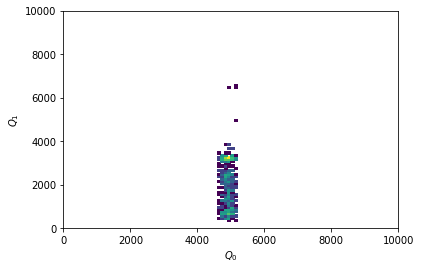

In [39]:
import matplotlib as mpl

h = plt.hist2d(Q0,Q1,bins=(100,100),range=((0,10000),(0,10000)),norm=mpl.colors.LogNorm())
plt.xlabel('$Q_0$')
plt.ylabel('$Q_1$')

Text(0, 0.5, '$t_1$')

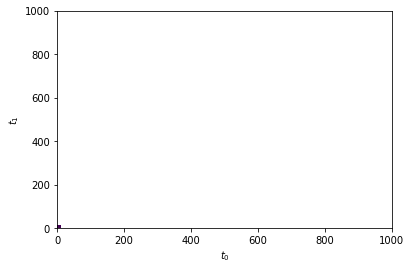

In [40]:
h = plt.hist2d(t0,t1,bins=(100,100),range=((0,1000),(0,1000)),norm=mpl.colors.LogNorm())
plt.xlabel('$t_0$')
plt.ylabel('$t_1$')

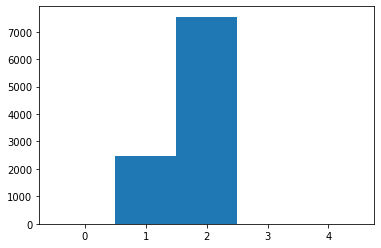

In [41]:
h = plt.hist(nvalid, bins=5, range=(-0.5,4.5))

(0.1, 10000.0)

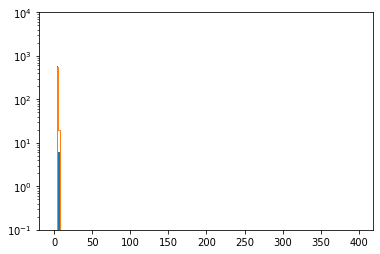

In [42]:
h = plt.hist(t0,bins=200,range=(-0.5,399.5),histtype='bar')
h = plt.hist(t1,bins=200,range=(-0.5,399.5),histtype='step')
plt.yscale('log')
plt.ylim([0.1,1e4])

A few basic plots: integrated charge and time

python\DT5550.py:130: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


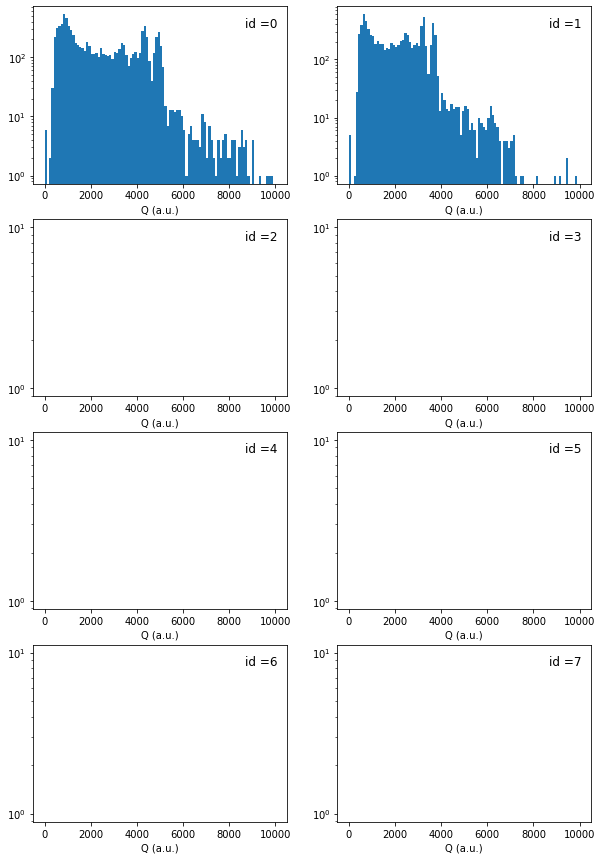

In [43]:
io.plot_all(type="charge",range=(0,10000),bins=100,logy=True)

python\DT5550.py:110: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


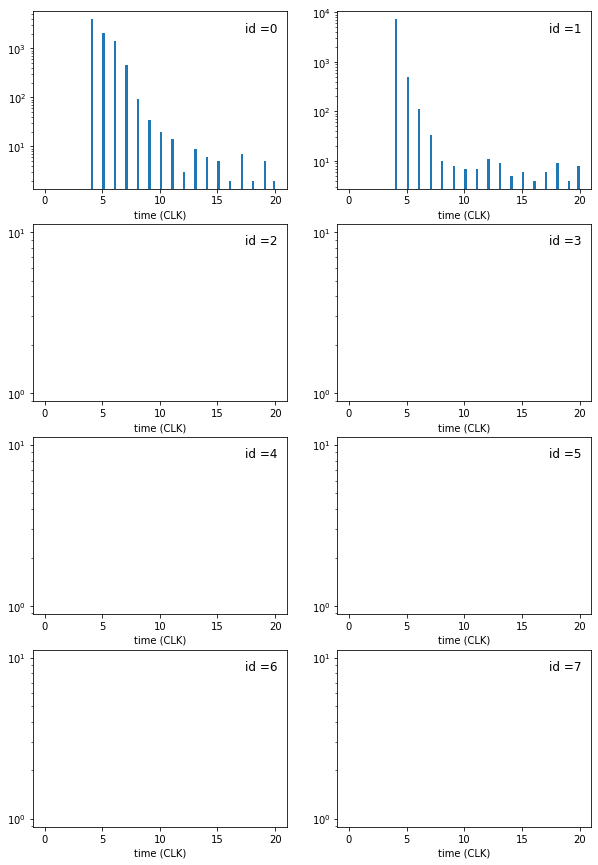

In [44]:
io.plot_all(type="time",range=(0,20),bins=100,logy=True)

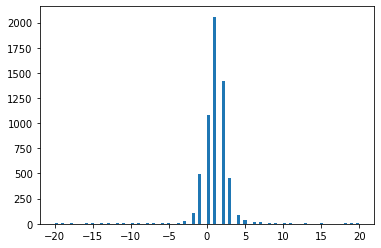

In [10]:
h=plt.hist((np.array(t0)-np.array(t1)),bins=100,range=(-20,20))


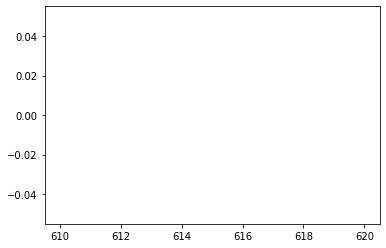

In [11]:
h = plt.hist(np.array(t0),bins=100,range=(610,620))

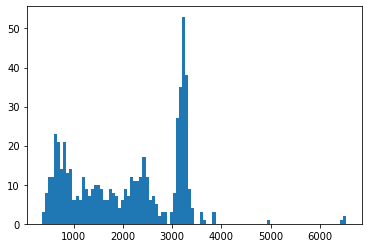

In [48]:
h=plt.hist(Q1,bins=100)

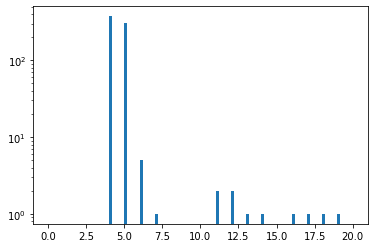

In [53]:
h=plt.hist(t0,bins=100,range=(0,20))
plt.yscale('log')